# Additional Exercises - Frequency Distribution


In this notebook (set of exercises) we will create a tool that, given a corpus of text files and a search term, is able to provide us with information about the frequency distribution of the term across the files in the corpus.

The solution we will implement is not perfect and very much influenced by educational decisions. After finishing the exercise, you will be invited to think about ways of optimizing the solution.

## Setup

This is a little bit of setup. First, we import necessary libraries. Of course, feel free to add libraries as needed! After, we clone the workshop repository and use the provided helper script to download a series of Sherlock Holmes short stories.

In [1]:
# Regular Expressions
import re

# Pathlib
from pathlib import Path

# Counter for getting frequencies
from collections import Counter

# DataFrames
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%%capture
!git clone https://github.com/IngoKl/python-programming-for-linguists
!cd python-programming-for-linguists/2021/data && sh download_sherlockholmes.sh

## Step 1: Preparing the Data

After running the `download_sherlockholmes.sh` script above, you will have 12 short stories (*The Adventures of Sherlock Holmes*) in the `python-programming-for-linguists/2021/data/corpora/holmes` folder.

The goal of this first step is to read and prepare the data. Your goal will be to create the data structure below. 

Please note that there are other, better and more efficient, data structures to achieve the same goals. However, we are building a solution that mirrors practices in corpus linguistics without being too conscious of memory of computation limitations.

In [3]:
corpus = [
          {
           'filename': 'bery.txt', 
           'text': '...', 
           'story_title': 'THE ADVENTURE OF THE BERYL CORONET', 
           'length': None, 
           'frequencies': {}
          },
]

corpus

[{'filename': 'bery.txt',
  'frequencies': {},
  'length': None,
  'story_title': 'THE ADVENTURE OF THE BERYL CORONET',
  'text': '...'}]

Obviously, your solution will create a list with more than one item. The `frequencies` dictionary as well as `length` can be empty for now. We will populate it in the next step. `text` is supposed to contain the actual text.

If you want to, you can preprocess the text before adding it to `corpus`.

The trickiest bit is getting the `story_title` from the file. Have a look at one of the actual text files and remember what you've learned about regular expressions.

In [4]:
def get_story_title(text):
  title = re.search(" *([A-Z '-]+)\n", text).group(1)
  return title

def preprocess_text(text):
  text = text.lower()
  text = re.sub('\n+', ' ', text)
  text = re.sub(' +', ' ', text)

  return text

In [5]:
corpus = []
files = Path('python-programming-for-linguists/2021/data/corpora/holmes').glob('*.txt')

for f in files:
  filename = f.name
  text = preprocess_text(f.read_text())
  story_title = get_story_title(f.read_text())

  corpus.append({'filename': filename, 
                 'text': text, 
                 'story_title': story_title, 
                 'length': None, 
                 'frequencies': {}
                 })

## Step 2: Getting the Frequencies

You will need to generate frequency tables and add them to `corpus`. At the same time, you should populate `length` with the number of tokens in the document.

This also means that you will have to tokenize the stories first. Remember that you can use `dict()` to turn a `Counter` object into a dictionary.

Ultimately, `frequency`, for each story, should contain a structure like below:

In [6]:
frequencies = {
    'word_a': 42,
    'word_b': 12,
}

In [7]:
def tokenize(text):
  return re.findall('\w+', text)

In [8]:
for story in corpus:
  tokenized_story = tokenize(story['text'])
  frequencies = dict(Counter(tokenized_story))

  story['length'] = len(tokenized_story)
  story['frequencies'] = frequencies

## Step 3: Frequencies and Frequency Distribution

Now you will need to write a function that takes a `corpus` as well as `search_term`. You will also need to account for both the absolute as well as the relative (per 1,000 tokens) frequencies.

If you need to check whether something is in a dictionary, you can do the following: `if x in y`

You will generate a frequency table for the search term that looks as follows:

In [9]:
frequency_table = {
    # Filename: (abs_frequency, rel_frequency_per_1000)
    'story_title_a': (1, 2),
    'story_title_b': (1, 2)
}

In [10]:
def get_frequencies(corpus, search_term):

  frequency_table = {}

  for story in corpus:

    # Absolute Frequency
    if search_term in story['frequencies']:
      abs_frequency = story['frequencies'][search_term]
    else:
      abs_frequency = 0

    rel_frequency = (abs_frequency / story['length']) * 1000

    # Relative Frequency (per 1,000 tokens)
    frequency_table[story['story_title']] = (abs_frequency, rel_frequency)

  return frequency_table


The following code is **provided for you**. You don't have to change anything here. Just need to make sure that you `get_frequencies` function works well with it. 

* We will nicely print the results
* We will calculate a very basic dispersion statistic (Range_2)
* We will plot the results using `seaborn`

In [11]:
def plot_frequency_table(frequency_table, search_term):

  df = pd.DataFrame(frequency_table).transpose()
  df.columns = ['abs_frequency', 'rel_frequency']
  df = df.sort_values('rel_frequency', ascending=False)

  ax = sns.barplot(y=df.index, x='rel_frequency', data=df, color='#EF2D56')
  ax.set_title(f'Frequency Distribution of {search_term} (per 1,000 Tokens')

Distribution of "watson":

- 16 (1.69 per 1,000 tokens) in THE MAN WITH THE TWISTED LIP
- 10 (1.07 per 1,000 tokens) in HEADED LEAGUE
- 7 (0.84 per 1,000 tokens) in THE ADVENTURE OF THE NOBLE BACHELOR
- 7 (0.69 per 1,000 tokens) in THE ADVENTURE OF THE COPPER BEECHES
- 4 (0.53 per 1,000 tokens) in THE FIVE ORANGE PIPS
- 4 (0.56 per 1,000 tokens) in A CASE OF IDENTITY
- 4 (0.41 per 1,000 tokens) in THE BOSCOMBE VALLEY MYSTERY
- 2 (0.2 per 1,000 tokens) in THE ADVENTURE OF THE BERYL CORONET
- 9 (1.12 per 1,000 tokens) in THE ADVENTURE OF THE BLUE CARBUNCLE
- 0 (0.0 per 1,000 tokens) in THE ADVENTURE OF THE ENGINEER'S THUMB
- 6 (0.69 per 1,000 tokens) in A SCANDAL IN BOHEMIA
- 12 (1.2 per 1,000 tokens) in THE ADVENTURE OF THE SPECKLED BAND

The Range_2 is: 91.67%



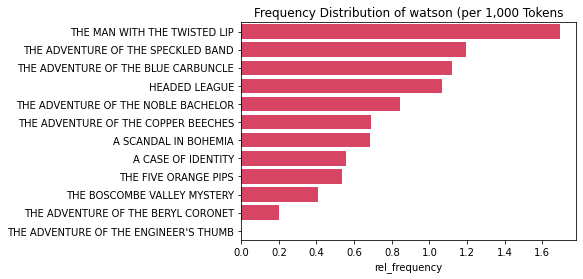

In [12]:
search_term = 'watson'

parts_with_st = 0
frequency_table = get_frequencies(corpus, search_term)

print(f'Distribution of "{search_term}":\n')
for s in frequency_table:
  
  if frequency_table[s][0] > 0:
    parts_with_st += 1

  print(f'- {frequency_table[s][0]} ({round(frequency_table[s][1], 2)} per 1,000 tokens) in {s}')

# Range_2
range_2 = ( parts_with_st / len(frequency_table.keys()) ) * 100

print(f'\nThe Range_2 is: {round(range_2, 2)}%\n')

plot_frequency_table(frequency_table, search_term)

## Making it Better

Now we have a working solution that does what we set out to do. However, it is definitely not the most efficient or most elegant solution.

Can you think of some ways of making this program better?

*   If we combined steps one and two, we would not have to store the actual `text` in our corpus object. This would save a lot of memory!
*   In step one, we are reading each file twice. Once to get the text and again to get the `story_title`. This isn't necessarily a problem for 10 or 20 files, but it becomes important very quickly. That said, often there are memory vs. speed trade-offs.
* Storing individual frequency tables for each document is wasteful in terms of memory as we are storing each word in the vocabulary multiple times.
* Since we are storing individual frequency tables, we need to mitigate differences between the vocabularies of each document. For example, we need to mitigage if a `search_term` does not appear in a document. An alternative would be a vocabulary, across all documents, approach. Here we would first create a vocabulary of all words in all documents. Then we would get frequencies for each document and each word.

These are just some suggestions. Ultimately, there are many ways of achieving the same result - each with its own pros and cons. When developing solutions, you should also be mindful of what you are doing why.

## Bonus: Dispersion Statistics

If you are interested in playing with dispersion statistics, have a look at this function:

In [19]:
import numpy as np

def dispersion_statistics(frequency_table):
    document_lengths = {}
    for d in corpus:
        document_lengths[d['story_title']] = d['length']
        
    # The percentage the term makes up of each document
    p = [f[0] / document_lengths[t] for t, f in frequency_table.items()]
    
    frequencies = [f[0] for f in frequency_table.values()]
    
    n = len(frequencies)
    range_1 = len([f for f in frequencies if f > 0])
    range_2 = round((range_1 / n) * 100, 2)
    
    mean = np.mean(frequencies)
    mean_p = np.mean(p)
    
    std = np.std(frequencies)
    std_p = np.std(p)
    
    cv = std / mean
    cv_p = std_p / mean_p
    
    D = 1 - (cv / np.sqrt(n - 1))
    D_p = 1 - (cv_p / np.sqrt(n - 1))

    stats = {'n': n, 
             'mean': mean, 'mean_p': mean_p, 
             'range_2': range_2, 
             'std': std, 'std_p': std_p, 
             'cv': cv, 'cv_p': cv_p, 
             'D': D, 'D_p': D_p
    }


    return stats

In [20]:
frequency_table = get_frequencies(corpus, 'watson')
dispersion_statistics(frequency_table)

{'D': 0.8086329244383665,
 'D_p': 0.819914027984733,
 'cv': 0.6346927868655285,
 'cv_p': 0.5972775991810831,
 'mean': 6.75,
 'mean_p': 0.0007495326821571226,
 'n': 12,
 'range_2': 91.67,
 'std': 4.284176311342318,
 'std_p': 0.00044767908090656404}

For a detailled discussion of these statistics as well as the '_p' versions, have a look at: 

Gries, Stefan Th. 2020. “Analyzing Dispersion.” In A Practical Handbook of Corpus Linguistics, edited by Magali Paquot and Stefan T. Gries, 99–118. Cham: Springer Nature Switzerland.